# Credit EDA Case Study

## Problem Statement
#The company wants to understand the driving factors(or driver variables) behind loan default, i.e. the
#variableswhich are strong indicatorsof default.

## Step 1 : Start by importing the libraries &  'application_data.csv'.

## Step 2 : Check the structure of the data - info,size,shape.

## Step 3 : Data Quality Check and Missing values

#### 3a.Find the percentage of missing values for all the columns.

#### 3b.Remove columns with high missing percentage (>50%).

#### 3c.For columns which has less percentage(around 13% or so), we need to check what will be the best metric to impute the missing values? Like if the column you are checking is a categorical column check, which category you can use to fill the nulls. For others check doesmean or median can be imputed or not. Others cases may be imputing with 0. You need todo this task for some variables and not for all, say 5.

#### 3d.Check the datatypes of all the columns and change the Datatype like negative age and date.

#### 3e.For numerical columns check for outliers and report them for at-least 5 variables. Add observations and reasoning.

#### 3f.Binning of continuous variables. Check if you need to bin any variable in different categories. Do this for at least 2 variables.

## Step 4 : Analysis

#### 4a.Check the Imbalance percentage. No balancing technique required.

#### 4b. Divide the data into two sets, i.e. Target=1and Target=0.

#### 4c. Perform univariate analysis for categorical variables for both 0 and 1. Compare the target variable across categories of categorical variables.

#### 4d. Find correlation for numerical columns for both the cases, i.e. 0 and 1.

#### 4e. Check the variables with highest correlation are the same in both the files or not?

#### 4f. Perform univariate for numerical variables for both 0 and 1. Compared the target variable across categories of continuous variables.

#### 4g. Perform bivariate analysis for numerical variables for both 0 and 1.

## Step 5 :Read “Previous Application” data

#### 5a. merge the files

#### 5b. Perform univariate and bivariate analysis to find some pattern.

## Step 6 : Based on your analysis, define the results and conclusion.

## Step 1 : Start by importing the libraries &  'application_data.csv'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
pd.set_option("display.max_rows",None)

In [4]:
#Read the data in pandas
inp0= pd.read_csv("application_data.csv ")
inp1= pd.read_csv("previous_application.csv ")

In [5]:
#Print the head of the data frame.
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Print the information about the attributes of inp0 and inp1.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
inp0.shape

(307511, 122)

In [8]:
inp0.value_counts().sum()

8602

# Step 3 : Data Quality Check and Missing values

### Fixing the Rows and Columns 

### Find the percentage of missing values for all the columns.

In [9]:
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
inp0.isnull().sum()*100/len(inp0)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Remove columns with high missing percentage (>50%) & using correlation

In [11]:
inp0.drop(labels = ['DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','LIVINGAREA_AVG','BASEMENTAREA_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','COMMONAREA_MODE','ELEVATORS_MODE','YEARS_BUILD_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE' ,'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI' , 'BASEMENTAREA_MEDI' ,  'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI','FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','OWN_CAR_AGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
inp0.shape

(307511, 50)

In [13]:
inp0.dropna(axis=0,inplace=True)

In [14]:
inp0.shape

(181395, 50)

In [15]:
inp0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002716,-0.000711,-0.002866,-0.002075,-0.002517,-0.001561,0.000531,-0.003247,-0.001797,0.001221,-0.000034,NaN,0.001208,0.000821,0.003253,0.005522,-0.001972,-0.000555,0.001322,0.000948,-0.001318,-0.000431,0.002156,0.004280,-0.001679,-0.001617,-0.000303,0.000766,0.004317,0.000768,0.004437,-0.003158,-0.001493,-0.000613,-0.000902,0.000314,0.003427
TARGET,-0.002716,1.000000,0.008274,-0.002646,-0.038497,-0.018941,-0.048139,-0.036857,0.064866,0.075390,0.035641,0.037269,NaN,-0.001309,0.017400,0.001755,-0.025293,-0.005684,0.000487,0.061030,0.063466,-0.027477,0.003420,0.001415,-0.002608,0.041290,0.041711,0.022837,0.011487,0.032616,0.011417,0.030059,0.000912,0.001034,0.000594,-0.015556,-0.002121,0.024293
CNT_CHILDREN,-0.000711,0.008274,1.000000,-0.003394,-0.020581,-0.006438,-0.024073,-0.028674,0.253999,0.068482,0.163905,-0.116043,NaN,0.004123,-0.006108,0.004519,-0.033206,0.006953,0.895949,0.035815,0.035677,-0.030845,-0.022507,-0.016929,-0.007796,0.001558,0.010462,0.016323,0.021328,0.003287,0.020998,0.001963,-0.002365,-0.001145,-0.001294,-0.021621,-0.003432,-0.032554
AMT_INCOME_TOTAL,-0.002866,-0.002646,-0.003394,1.000000,0.124374,0.152919,0.126680,0.059787,-0.017488,-0.008510,0.010441,-0.007749,NaN,-0.002643,-0.029450,-0.007424,0.001082,0.029185,-0.001092,-0.069403,-0.074864,0.021181,0.023890,0.047648,0.044251,-0.001618,-0.008487,-0.004874,-0.011643,-0.011269,-0.011577,-0.010875,0.000535,0.002932,0.002326,0.019584,0.003797,0.008972
AMT_CREDIT,-0.002075,-0.038497,-0.020581,0.124374,1.000000,0.761405,0.986383,0.099428,-0.153568,-0.087332,-0.020643,-0.030720,NaN,-0.005692,-0.037147,0.029524,0.030213,0.007578,0.033317,-0.102901,-0.111782,0.038263,0.021739,0.048294,0.048202,-0.037997,-0.039940,-0.016829,-0.003477,-0.024470,-0.003438,-0.025654,-0.002577,0.003916,-0.002321,0.052312,0.016894,-0.050481
AMT_ANNUITY,-0.002517,-0.018941,-0.006438,0.152919,0.761405,1.000000,0.765468,0.116145,-0.092525,-0.050761,0.007098,-0.023677,NaN,-0.004655,-0.052860,0.031016,0.012345,0.067801,0.042423,-0.125957,-0.139157,0.030980,0.039284,0.073781,0.069023,-0.019690,-0.029047,-0.014152,-0.013962,-0.023306,-0.013769,-0.023998,0.004956,0.000392,0.014371,0.036062,0.013022,-0.006165
AMT_GOODS_PRICE,-0.001561,-0.048139,-0.024073,0.126680,0.986383,0.765468,1.000000,0.103423,-0.148652,-0.089698,-0.017601,-0.032774,NaN,-0.006034,-0.012021,0.025897,0.046768,0.008628,0.031914,-0.104559,-0.112801,0.048066,0.023745,0.049403,0.048534,-0.038111,-0.041273,-0.018092,-0.003781,-0.025384,-0.003769,-0.026160,-0.002606,0.004163,-0.001713,0.054768,0.017512,-0.053467
REGION_POPULATION_RELATIVE,0.000531,-0.036857,-0.028674,0.059787,0.099428,0.116145,0.103423,1.000000,-0.045782,0.004601,-0.060695,-0.007225,NaN,-0.002604,-0.018749,-0.015648,0.084618,0.037700,-0.026609,-0.522970,-0.520251,0.162726,-0.003943,0.058134,0.082456,-0.053328,-0.043885,-0.012590,-0.007933,0.010191,-0.007546,0.006011,-0.001590,-0.000041,-0.003060,0.080976,-0.001853,-0.002397
DAYS_BIRTH,-0.003247,0.064866,0.253999,-0.017488,-0.153568,-0.092525,-0.148652,-0.045782,1.000000,0.344840,0.297306,0.081420,NaN,0.001477,0.039312,-0.010523,-0.042876,0.065674,0.192332,0.041656,0.042005,0.044720,0.053692,0.033811,0.010456,0.164234,0.110560,0.030014,0.019545,0.01667

In [16]:
inp0.drop(labels = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','NAME_TYPE_SUITE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,0,0,Religion,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970.0,-477,Laborers,2.0,WEDNESDAY,16,0,0,Other,0.0,0.0,0.0,0.0,1.0,1.0


In [17]:
inp0.shape

(181395, 32)

In [18]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181395 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  181395 non-null  int64  
 1   TARGET                      181395 non-null  int64  
 2   NAME_CONTRACT_TYPE          181395 non-null  object 
 3   CODE_GENDER                 181395 non-null  object 
 4   FLAG_OWN_CAR                181395 non-null  object 
 5   FLAG_OWN_REALTY             181395 non-null  object 
 6   CNT_CHILDREN                181395 non-null  int64  
 7   AMT_INCOME_TOTAL            181395 non-null  float64
 8   AMT_CREDIT                  181395 non-null  float64
 9   AMT_ANNUITY                 181395 non-null  float64
 10  AMT_GOODS_PRICE             181395 non-null  float64
 11  NAME_INCOME_TYPE            181395 non-null  object 
 12  NAME_EDUCATION_TYPE         181395 non-null  object 
 13  NAME_FAMILY_ST

In [19]:
inp0['TARGET'].corr(inp0['CNT_FAM_MEMBERS' ])

0.0004868350965500078

In [20]:
inp0['TARGET'].corr(inp0['CNT_CHILDREN' ])

0.008274282219559738

In [21]:
inp0['TARGET'].corr(inp0['REG_REGION_NOT_WORK_REGION' ])

0.0014149600129824583

In [22]:
inp0['TARGET'].corr(inp0['REG_REGION_NOT_LIVE_REGION' ])

0.0034199413463037

In [23]:
inp0.drop(labels = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_FAM_MEMBERS','CNT_CHILDREN','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION'],axis=1,inplace=True)


In [24]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181395 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  181395 non-null  int64  
 1   TARGET                      181395 non-null  int64  
 2   NAME_CONTRACT_TYPE          181395 non-null  object 
 3   CODE_GENDER                 181395 non-null  object 
 4   AMT_INCOME_TOTAL            181395 non-null  float64
 5   AMT_CREDIT                  181395 non-null  float64
 6   AMT_ANNUITY                 181395 non-null  float64
 7   AMT_GOODS_PRICE             181395 non-null  float64
 8   NAME_INCOME_TYPE            181395 non-null  object 
 9   NAME_EDUCATION_TYPE         181395 non-null  object 
 10  NAME_FAMILY_STATUS          181395 non-null  object 
 11  NAME_HOUSING_TYPE           181395 non-null  object 
 12  DAYS_BIRTH                  181395 non-null  int64  
 13  DAYS_EMPLOYED 

### Check the datatypes of all the columns and change the Datatype like negative age,date,employed days.

In [25]:
inp0['DAYS_BIRTH'] = inp0['DAYS_BIRTH'].abs()

In [26]:
inp0['DAYS_BIRTH'] = round(inp0['DAYS_BIRTH'].abs()/365)

In [27]:
inp0['DAYS_EMPLOYED'] = inp0['DAYS_EMPLOYED'].abs()


In [28]:
 inp0['DAYS_REGISTRATION'] = inp0['DAYS_REGISTRATION'].abs()


In [29]:
inp0['DAYS_ID_PUBLISH'] = inp0['DAYS_ID_PUBLISH'].abs()


In [30]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,26.0,637,3648.0,2120,Laborers,WEDNESDAY,10,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,46.0,1188,1186.0,291,Core staff,MONDAY,11,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.0,225,4260.0,2531,Laborers,MONDAY,9,Government,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,55.0,3038,4311.0,3458,Core staff,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,46.0,1588,4970.0,477,Laborers,WEDNESDAY,16,Other,0.0,0.0,0.0,0.0,1.0,1.0


### For numerical columns check for outliers and report them for at-least 5 variables. Add observations and reasoning.

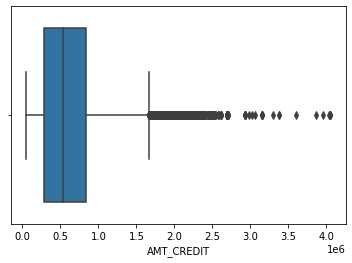

In [31]:
sns.boxplot(inp0['AMT_CREDIT'])
plt.show()

##### The interquartile range of data for amount credited has many outliers. The credit amount of above 16 million and above are the outliers. The data is positively skewed.

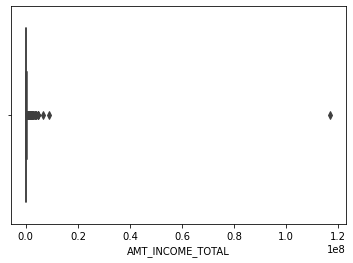

In [38]:
sns.boxplot(inp0['AMT_INCOME_TOTAL'])
plt.show()


In [39]:
inp0[inp0.AMT_INCOME_TOTAL>100000000]   # Outlier row

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,117000000.0,562491.0,26194.5,454500.0,Working,Secondary / secondary special,Married,House / apartment,35.0,922,6762.0,3643,Laborers,TUESDAY,14,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0


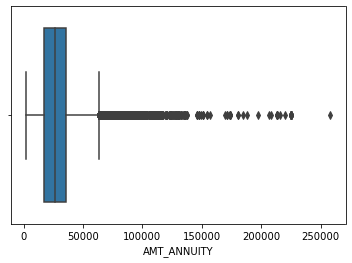

In [35]:
sns.boxplot(inp0['AMT_ANNUITY'])
plt.show()

##### The interquartile range of data for amount credited has many outliers. The annuity amount of above 60000 and above are the outliers. The data is positively skewed.

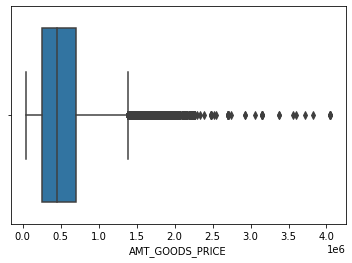

In [36]:
sns.boxplot(inp0['AMT_GOODS_PRICE'])
plt.show()

##### The interquartile range of data for amount credited has many outliers. The goods price amount of above 14.5 million and above are the outliers. The data is positively skewed.

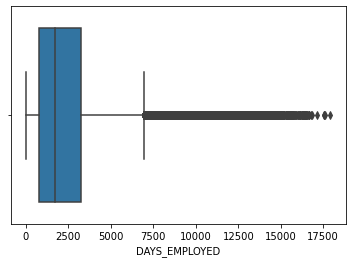

In [40]:
sns.boxplot(inp0['DAYS_EMPLOYED'])
plt.show()

##### The interquartile range of data for amount credited has many outliers. The clients who are employed 7300 days and above are the outliers. The data is positively skewed.

### Binning of continuous variables. Check if you need to bin any variable in different categories. Do this for at least 2 variables.

In [43]:
pd.qcut(inp0['DAYS_BIRTH'],5).value_counts()

(20.999, 31.0]    38012
(37.0, 43.0]      37950
(43.0, 50.0]      35720
(31.0, 37.0]      35195
(50.0, 69.0]      34518
Name: DAYS_BIRTH, dtype: int64

In [44]:
pd.qcut(inp0['AMT_INCOME_TOTAL'],5).value_counts() 

(26549.999, 112500.0]      50385
(135000.0, 180000.0]       41131
(225000.0, 117000000.0]    31947
(180000.0, 225000.0]       28967
(112500.0, 135000.0]       28965
Name: AMT_INCOME_TOTAL, dtype: int64

In [47]:
pd.qcut(inp0['AMT_GOODS_PRICE'],5).value_counts()

(553500.0, 900000.0]     45997
(40499.999, 225000.0]    38216
(418500.0, 553500.0]     36389
(225000.0, 418500.0]     34435
(900000.0, 4050000.0]    26358
Name: AMT_GOODS_PRICE, dtype: int64

### Check the Imbalance percentage. No balancing technique required.

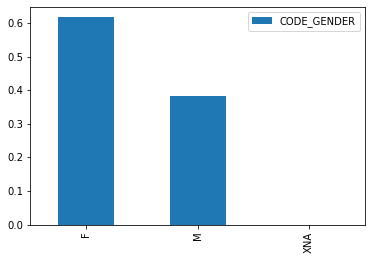

In [41]:
inp0['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [50]:
inp0['CODE_GENDER'].value_counts(normalize=True)*100 ## Percentage of Female clients(61%) are more than male(38%) clients.

F      61.670388
M      38.328510
XNA     0.001103
Name: CODE_GENDER, dtype: float64

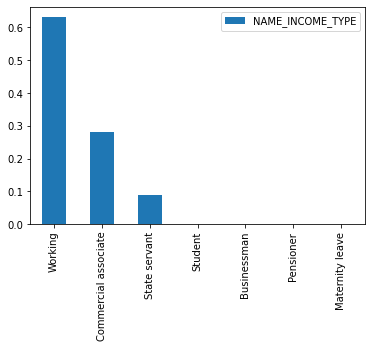

In [48]:
inp0['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [54]:
inp0['NAME_INCOME_TYPE'].value_counts(normalize=True)*100 

Working                 63.197993
Commercial associate    27.968797
State servant            8.824389
Student                  0.005513
Businessman              0.001654
Pensioner                0.001103
Maternity leave          0.000551
Name: NAME_INCOME_TYPE, dtype: float64

In [ ]:
## Clients Income type - The first three types are : Working(63%), Commercial associate(28%) & State servant(~9%) respectively.

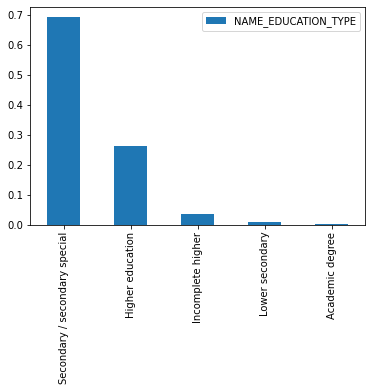

In [51]:
inp0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [55]:
inp0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    69.218556
Higher education                 26.235563
Incomplete higher                 3.617520
Lower secondary                   0.875989
Academic degree                   0.052372
Name: NAME_EDUCATION_TYPE, dtype: float64

In [ ]:
## Clients Education type - The first three types are : Secondary/secondary special(69%), Higher education(26%) & Incomplete higher(3.61%) respectively.

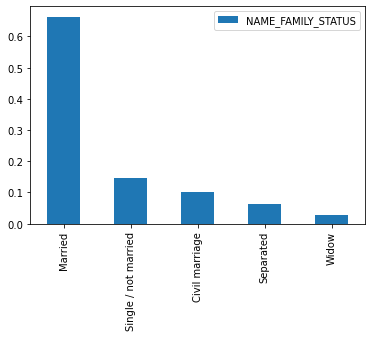

In [52]:
inp0['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [56]:
inp0['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 66.317153
Single / not married    14.613964
Civil marriage          10.060366
Separated                6.385512
Widow                    2.623005
Name: NAME_FAMILY_STATUS, dtype: float64

In [ ]:
## Clients Family status : Married (66%) are the highest followed by Single/ not married(14%) & Civil marriage(3.61%) respectively.

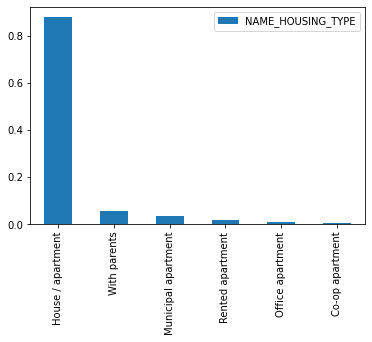

In [53]:
inp0['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [57]:
inp0['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

House / apartment      87.848066
With parents            5.500152
Municipal apartment     3.566250
Rented apartment        1.765760
Office apartment        0.913476
Co-op apartment         0.406296
Name: NAME_HOUSING_TYPE, dtype: float64

In [ ]:
# Clients Housing Type : House/apartment (87%) are the highest followed by With parents(5.50%) & Municipal apartment(3.56%) respectively.

### Divide the data into two sets, i.e. Target=1and Target=0.

In [152]:
df_1 =inp0[inp0['TARGET']==1]

In [153]:
df_0 =inp0[inp0['TARGET']==0]

### Perform univariate analysis for categorical variables for both 0 and 1. Compare the target variable across categories of categorical variables.

### df_1 = Defaulter

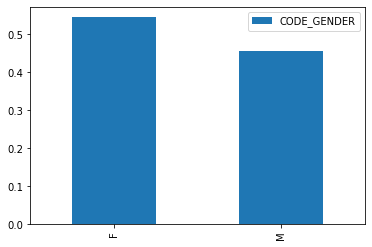

In [154]:
df_1['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [155]:
df_1['CODE_GENDER'].value_counts(normalize=True)*100

F    54.462826
M    45.537174
Name: CODE_GENDER, dtype: float64

In [156]:
## Percentage of Female client defaulter (61%) are more than male(38%) client defaulter.

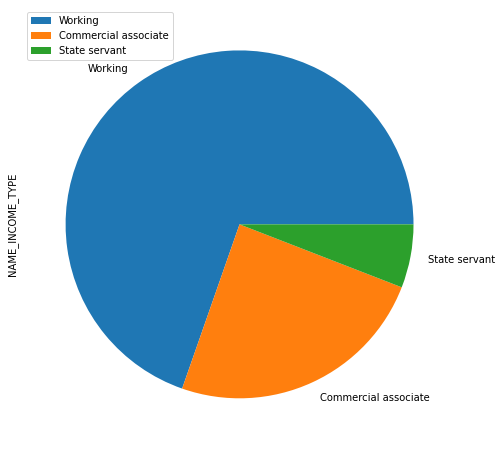

In [157]:
plt.figure(figsize = (10,8))
df_1['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.pie()
plt.legend(loc='upper left')
plt.show()

In [158]:
df_1['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 69.646243
Commercial associate    24.462172
State servant            5.891584
Name: NAME_INCOME_TYPE, dtype: float64

In [159]:
## Percentage of defaulters - Income type variable : 1. Working (69%) 2. Commercial associate (24.4%) & 3. State servant(5.89%)

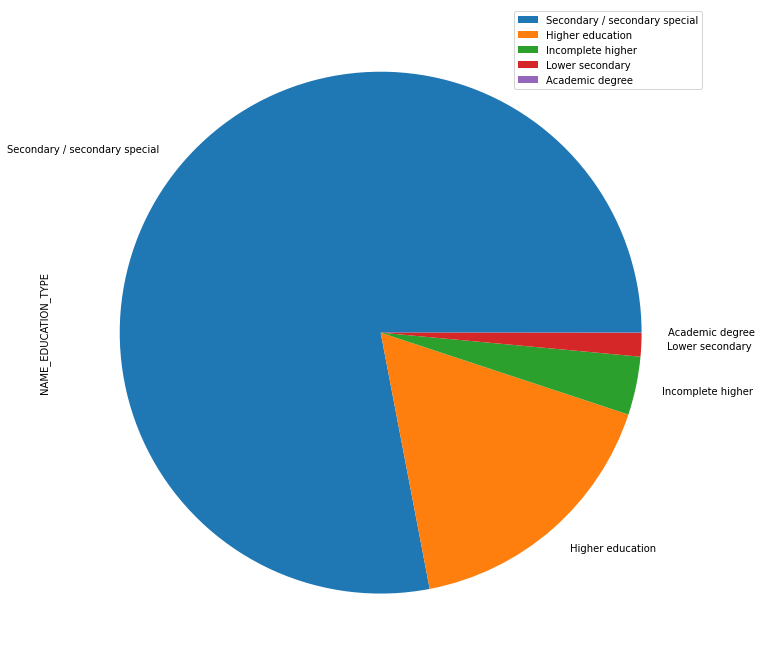

In [160]:
plt.figure(figsize = (16,12))
df_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.pie()
plt.legend(loc='upper right')
plt.show()

In [161]:
df_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    78.009547
Higher education                 16.909697
Incomplete higher                 3.609495
Lower secondary                   1.458183
Academic degree                   0.013078
Name: NAME_EDUCATION_TYPE, dtype: float64

In [162]:
## Percentage of defaulters - Education type: 
#1. Secondary /  secondary special (78%) 
#2. Higher education (16.9%) & 
#3. Incomplete higher(3.6%)

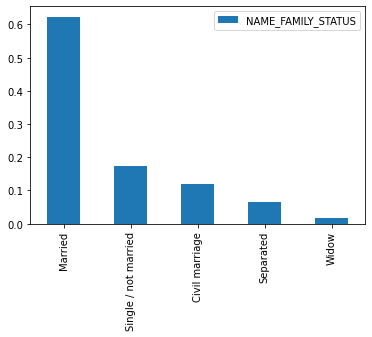

In [163]:
df_1['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [164]:
df_1['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 62.342248
Single / not married    17.275878
Civil marriage          12.090499
Separated                6.440855
Widow                    1.850520
Name: NAME_FAMILY_STATUS, dtype: float64

In [165]:
## Percentage of defaulters -Family status: 
#1. Married (62%) 
#2. Single / not married (17.27%) & 
#3. Civil marriage(12.09%)

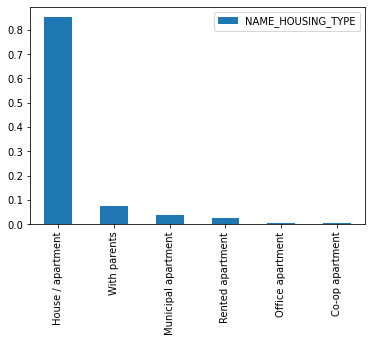

In [166]:
df_1['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [167]:
df_1['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

House / apartment      85.208919
With parents            7.480547
Municipal apartment     3.714118
Rented apartment        2.510953
Office apartment        0.699667
Co-op apartment         0.385797
Name: NAME_HOUSING_TYPE, dtype: float64

In [168]:
## Percentage of defaulters - Housing type: 
#1. House / apartment (85%) 
#2. With parents (7%) & 
#3. Municipal apartment(3.7%)

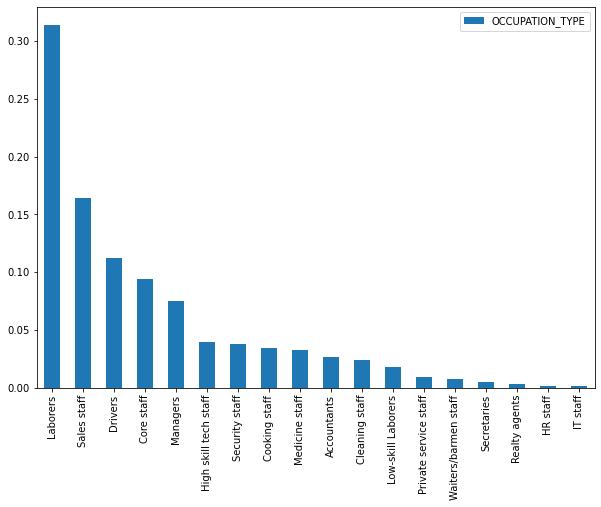

In [169]:
plt.figure(figsize=(10, 7))
df_1['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [170]:
df_1['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 31.386909
Sales staff              16.393121
Drivers                  11.214281
Core staff                9.409534
Managers                  7.539397
High skill tech staff     3.929903
Security staff            3.740273
Cooking staff             3.393710
Medicine staff            3.289087
Accountants               2.694043
Cleaning staff            2.373635
Low-skill Laborers        1.752436
Private service staff     0.921990
Waiters/barmen staff      0.778134
Secretaries               0.503498
Realty agents             0.326947
HR staff                  0.183090
IT staff                  0.170012
Name: OCCUPATION_TYPE, dtype: float64

In [171]:
## Percentage of defaulters - Occupation type: 
#1. Laborers (~32%) 
#2. Sales staff (16%) & 
#3. Drivers (11.21%)

## Bottom two - HR staff(0.18%) & IT staff (0.17%)

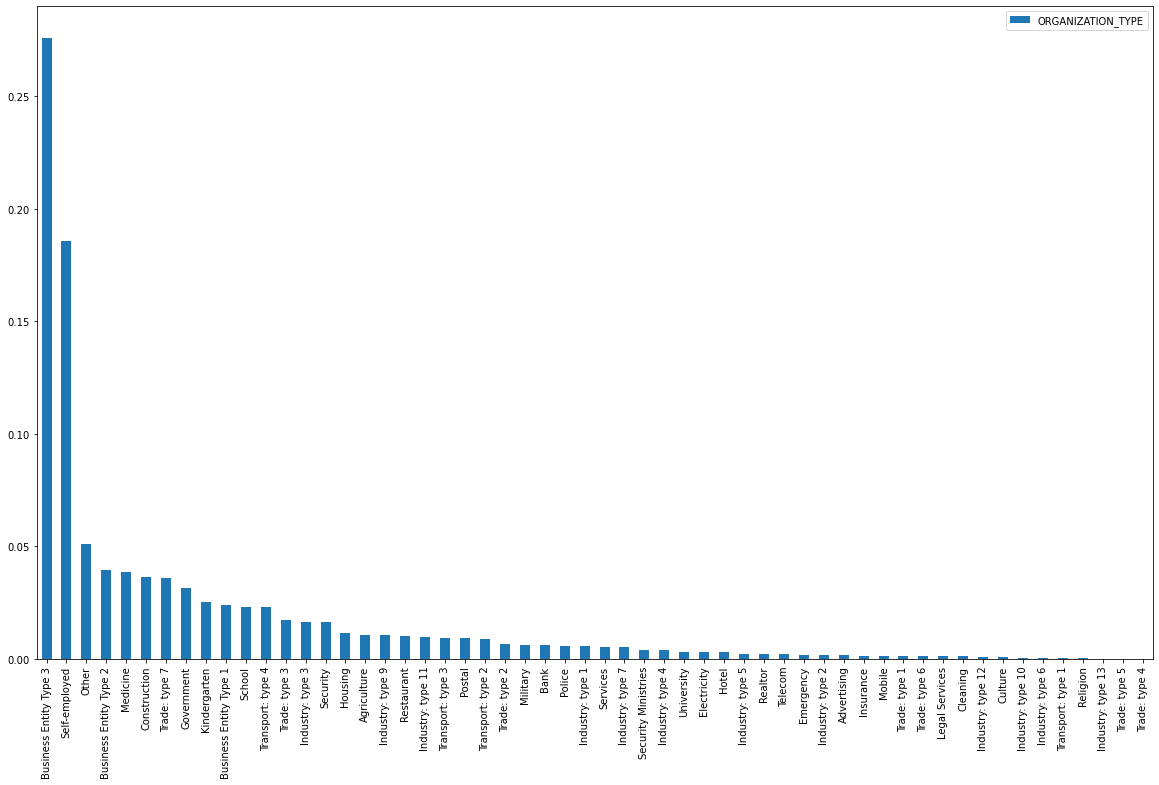

In [172]:
plt.figure(figsize=(20, 12))
df_1['ORGANIZATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [173]:
df_1['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

Business Entity Type 3    27.613941
Self-employed             18.550971
Other                      5.087295
Business Entity Type 2     3.942980
Medicine                   3.864513
Construction               3.648728
Trade: type 7              3.576800
Government                 3.164847
Kindergarten               2.524031
Business Entity Type 1     2.373635
School                     2.321323
Transport: type 4          2.301707
Trade: type 3              1.745897
Industry: type 3           1.621657
Security                   1.615118
Housing                    1.157392
Agriculture                1.059308
Industry: type 9           1.039691
Restaurant                 1.026613
Industry: type 11          0.967763
Transport: type 3          0.928529
Postal                     0.921990
Transport: type 2          0.889296
Trade: type 2              0.666972
Military                   0.634277
Bank                       0.634277
Police                     0.588505
Industry: type 1           0

In [174]:
## Percentage of defaulters - Organization type: 
#1.Business entity - Type 3 (27.61%) 
#2. Self employed (18.55%) & 
#3. Other (5.08%)

## Bottom two - Trade:type 5  & Trade:type 4 - 0.013%

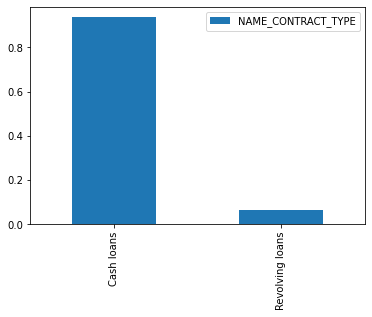

In [175]:
df_1['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [176]:
df_1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         93.644151
Revolving loans     6.355849
Name: NAME_CONTRACT_TYPE, dtype: float64

In [177]:
## Percentage of defaulters - Contract type: 
#1.Cash loans (93.64%) 
#2.Revolving loans (6.33%) 

### Compare the target variable across categories of continuous variables - Defaulters.

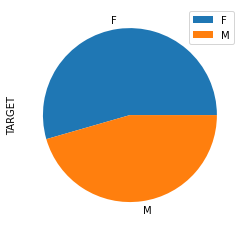

In [178]:
df_1.groupby(['CODE_GENDER'])[['TARGET']].sum().plot.pie(subplots=True)
plt.show()

In [179]:
df_1.groupby(['CODE_GENDER'])[['TARGET']].sum()/len(df_1)*100

,TARGET
CODE_GENDER,
F,54.462826
M,45.537174


In [180]:
## Percentage of defaulters - Comparison : Gender v/s Target variable: 
#1.Female (54.4%) 
#2.Male (45.53%) 

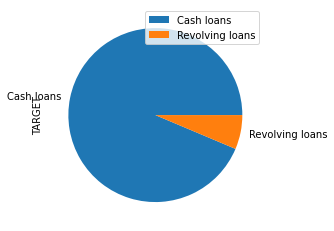

In [181]:
df_1.groupby(['NAME_CONTRACT_TYPE'])[['TARGET']].sum().plot.pie(subplots=True)
plt.show()

In [182]:
df_1.groupby(['NAME_CONTRACT_TYPE'])[['TARGET']].sum()/len(df_1)*100

,TARGET
NAME_CONTRACT_TYPE,
Cash loans,93.644151
Revolving loans,6.355849


In [183]:
## Percentage of defaulters - Comparison : Contract v/s Target variable: 
#1.Cash loans (93.64%) 
#2.Revolving loans (6.35%) 

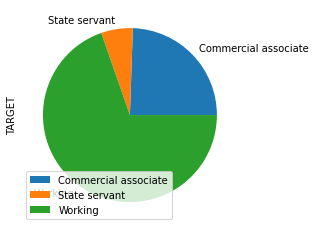

In [184]:
df_1.groupby(['NAME_INCOME_TYPE'])[['TARGET']].sum().plot.pie(subplots=True)
plt.show()

In [185]:
df_1.groupby(['NAME_INCOME_TYPE'])[['TARGET']].sum()/len(df_1)*100

,TARGET
NAME_INCOME_TYPE,
Commercial associate,24.462172
State servant,5.891584
Working,69.646243


In [186]:
## Percentage of defaulters - Comparison : Income type v/s Target variable: 
#1.Commercial associate (24.46%) 
#2.State servant (5.89%)
#3.Working (~70%)

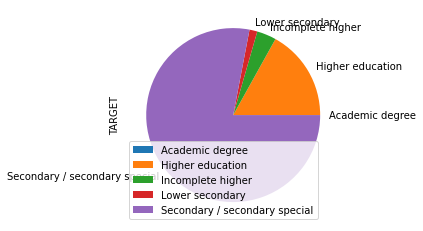

In [187]:
df_1.groupby(['NAME_EDUCATION_TYPE'])[['TARGET']].sum().plot.pie(subplots=True)
plt.show()

In [188]:
df_1.groupby(['NAME_EDUCATION_TYPE'])[['TARGET']].sum()/len(df_1)*100

,TARGET
NAME_EDUCATION_TYPE,
Academic degree,0.013078
Higher education,16.909697
Incomplete higher,3.609495
Lower secondary,1.458183
Secondary / secondary special,78.009547


In [189]:
## Percentage of defaulters - Comparison : Education type v/s Target variable: 
#1.Secondary/secondary special (78%)
#2.Higher education (17%) 
#3.Incomplete higher (3.6%)

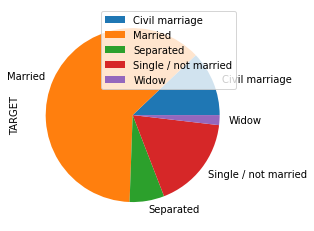

In [190]:
df_1.groupby(['NAME_FAMILY_STATUS'])[['TARGET']].sum().plot.pie(subplots=True)
plt.show()

In [191]:
df_1.groupby(['NAME_FAMILY_STATUS'])[['TARGET']].sum()/len(df_1)*100

,TARGET
NAME_FAMILY_STATUS,
Civil marriage,12.090499
Married,62.342248
Separated,6.440855
Single / not married,17.275878
Widow,1.850520


In [192]:
## Percentage of defaulters - Comparison : Family status v/s Target variable: 
#1.Married (62.34%)
#2.Single / not married (17.27%) 
#3.Civil marriage (12.09%)

### df_0 = Non-Defaulter

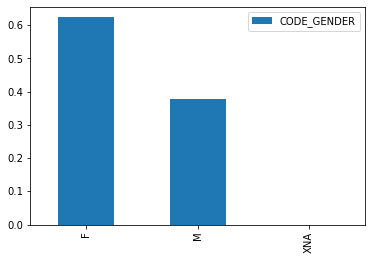

In [193]:
df_0['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [194]:
df_0['CODE_GENDER'].value_counts(normalize=True)*100

F      62.333988
M      37.664808
XNA     0.001204
Name: CODE_GENDER, dtype: float64

In [195]:
## Percentage of non- defaulter - Female (62%) v/s Male(37.66%)

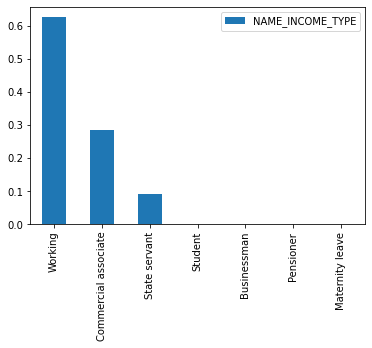

In [196]:
df_0['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [197]:
df_0['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 62.604303
Commercial associate    28.291652
State servant            9.094412
Student                  0.006020
Businessman              0.001806
Pensioner                0.001204
Maternity leave          0.000602
Name: NAME_INCOME_TYPE, dtype: float64

In [198]:
# Percentage of non-defaulters - Income type variable : 1. Working (62%) 2. Commercial associate (28%) & 3. State servant(9%)

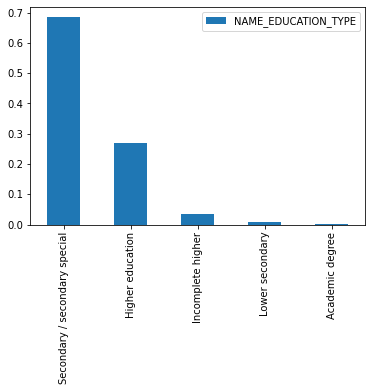

In [199]:
df_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [200]:
df_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    68.409170
Higher education                 27.094195
Incomplete higher                 3.618259
Lower secondary                   0.822386
Academic degree                   0.055990
Name: NAME_EDUCATION_TYPE, dtype: float64

In [201]:
## Percentage of NON- defaulters - Education type: 
#1. Secondary /  secondary special (68%) 
#2. Higher education (27.09%) & 
#3. Incomplete higher(3.6%)

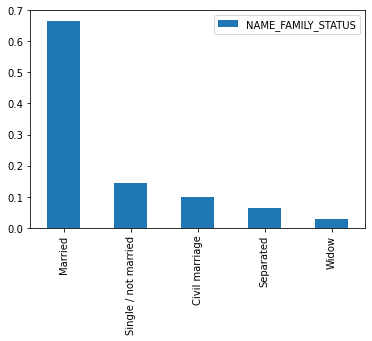

In [202]:
df_0['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [203]:
df_0['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 66.683122
Single / not married    14.368882
Civil marriage           9.873451
Separated                6.380417
Widow                    2.694128
Name: NAME_FAMILY_STATUS, dtype: float64

In [204]:
## Percentage of non- defaulters -Family status: 
#1. Married (66%) 
#2. Single / not married (14%) & 
#3. Civil marriage(~10%)

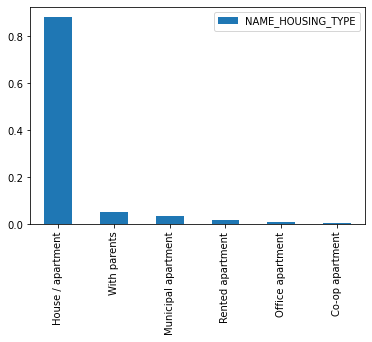

In [205]:
df_0['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [206]:
df_0['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

House / apartment      88.091052
With parents            5.317817
Municipal apartment     3.552636
Rented apartment        1.697150
Office apartment        0.933162
Co-op apartment         0.408183
Name: NAME_HOUSING_TYPE, dtype: float64

In [207]:
## Percentage of non-defaulters - Housing type: 
#1. House / apartment (88%) 
#2. With parents (5%) & 
#3. Municipal apartment(3.5%)

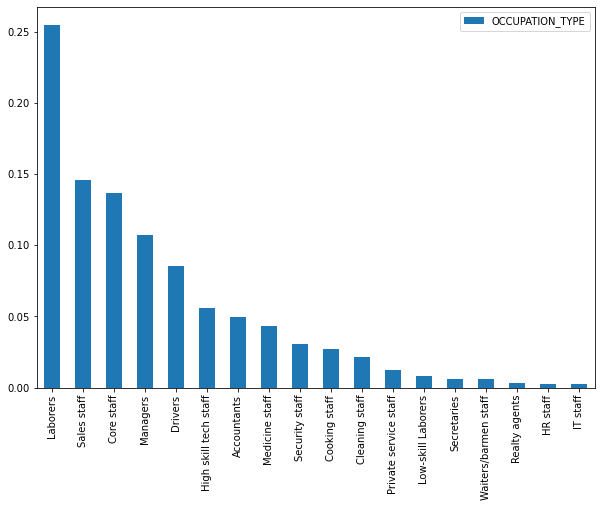

In [208]:
plt.figure(figsize=(10, 7))
df_0['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [209]:
df_0['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 25.452433
Sales staff              14.574177
Core staff               13.681352
Managers                 10.736776
Drivers                   8.521872
High skill tech staff     5.620041
Accountants               4.980675
Medicine staff            4.308798
Security staff            3.069800
Cooking staff             2.739281
Cleaning staff            2.153496
Private service staff     1.245620
Low-skill Laborers        0.806131
Secretaries               0.635754
Waiters/barmen staff      0.589999
Realty agents             0.345571
HR staff                  0.282959
IT staff                  0.255265
Name: OCCUPATION_TYPE, dtype: float64

In [210]:
## Percentage of non- defaulters - Occupation type: 
#1. Laborers (25%) 
#2. Sales staff (14.57%) & 
#3. Core staff (13.68%)

## Bottom two - HR staff(0.28%) & IT staff (0.25%)

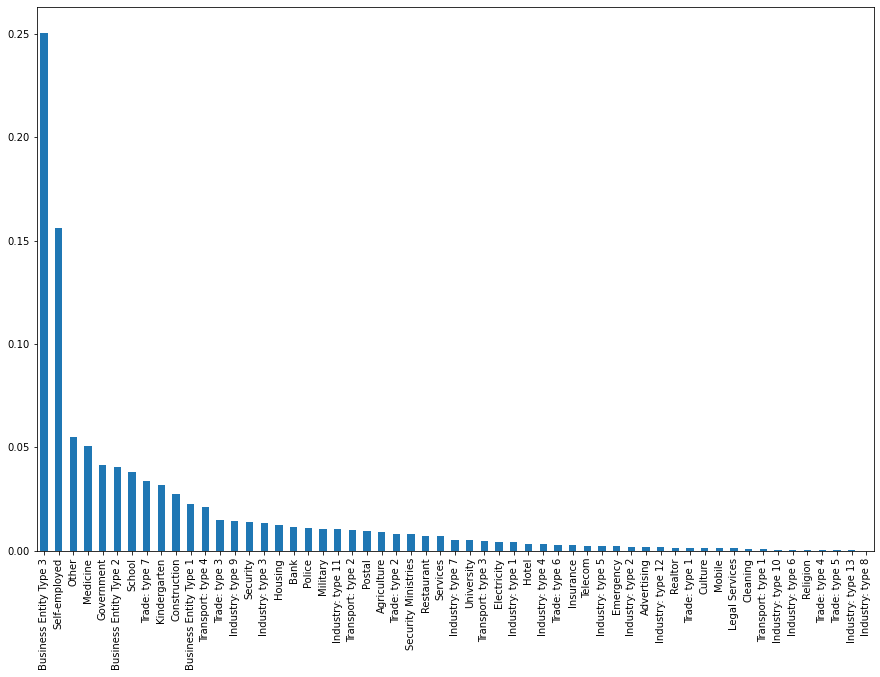

In [211]:
plt.figure(figsize=(15, 10))
df_0['ORGANIZATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.show()

In [212]:
df_0['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

Business Entity Type 3    25.042444
Self-employed             15.616308
Other                      5.500235
Medicine                   5.086634
Government                 4.142033
Business Entity Type 2     4.069788
School                     3.807901
Trade: type 7              3.357575
Kindergarten               3.182382
Construction               2.740485
Business Entity Type 1     2.246210
Transport: type 4          2.105935
Trade: type 3              1.497875
Industry: type 9           1.445497
Security                   1.407569
Industry: type 3           1.336528
Housing                    1.227559
Bank                       1.154110
Police                     1.092100
Military                   1.049355
Industry: type 11          1.049355
Transport: type 2          0.984335
Postal                     0.975906
Agriculture                0.924733
Trade: type 2              0.814560
Security Ministries        0.792284
Restaurant                 0.717631
Services                   0

In [213]:
## Percentage of non- defaulters - Organization type: 
#1.Business entity - Type 3 (25%) 
#2. Self employed (15%) & 
#3. Other (5.50%)

## Bottom two - Trade:type 5  & Trade:type 4 - 0.02%

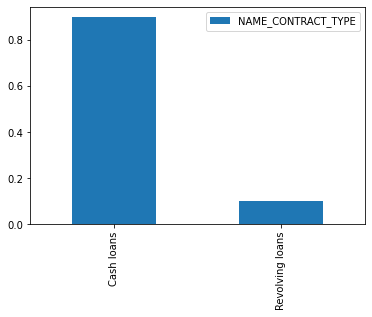

In [214]:
df_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()

In [215]:
df_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         89.920049
Revolving loans    10.079951
Name: NAME_CONTRACT_TYPE, dtype: float64

In [216]:
## Percentage of non-defaulters - Contract type: 
#1.Cash loans (~90%) 
#2.Revolving loans (10%) 

### Find correlation for numerical columns for both the cases, i.e. 0 and 1.

In [93]:
df_1['AMT_CREDIT'].corr(df_1['AMT_ANNUITY'])

0.7447261033046653

In [94]:
df_1['AMT_GOODS_PRICE'].corr(df_1['AMT_ANNUITY'])

0.7464790189441393

In [95]:
df_1['AMT_INCOME_TOTAL'].corr(df_1['AMT_CREDIT'])

0.030829909114524802

In [96]:
df_1['AMT_INCOME_TOTAL'].corr(df_1['AMT_ANNUITY'])

0.03688689426497912

In [97]:
df_0['AMT_CREDIT'].corr(df_0['AMT_ANNUITY'])

0.7624563331205557

In [98]:
df_0['AMT_GOODS_PRICE'].corr(df_0['AMT_ANNUITY'])

0.7668008528834512

In [99]:
df_0['AMT_INCOME_TOTAL'].corr(df_0['AMT_CREDIT'])

0.3481139751849594

In [100]:
df_0['AMT_INCOME_TOTAL'].corr(df_0['AMT_ANNUITY'])

0.42866967228093567

### Perform univariate for numerical variables for both 0 and 1. Compare the target variable across categories of continuous variables

### Perform bivariate analysis for numerical variables for both 0 and 1.

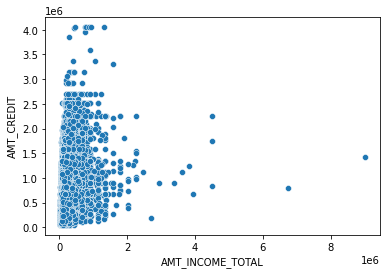

In [102]:
sns.scatterplot(data = df_0,x ='AMT_INCOME_TOTAL',y = 'AMT_CREDIT')
plt.show()
# Presence of very few outliers

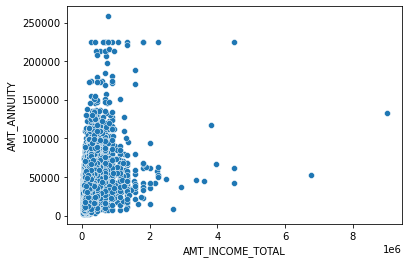

In [219]:
sns.scatterplot(data = df_0,x ='AMT_INCOME_TOTAL',y = 'AMT_ANNUITY')
plt.show()
# Presence of very few outliers

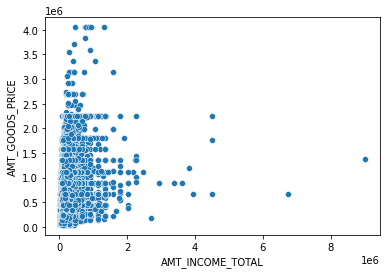

In [220]:
sns.scatterplot(data = df_0,x ='AMT_INCOME_TOTAL',y = 'AMT_GOODS_PRICE')
plt.show()
# Presence of very few outliers

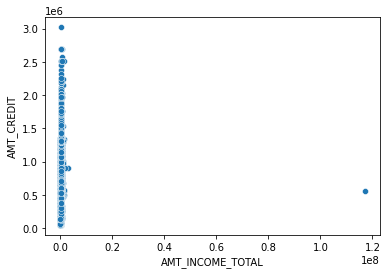

In [221]:
sns.scatterplot(data = df_1,x ='AMT_INCOME_TOTAL',y = 'AMT_CREDIT')
plt.show()
# Presence of one distinct outlier

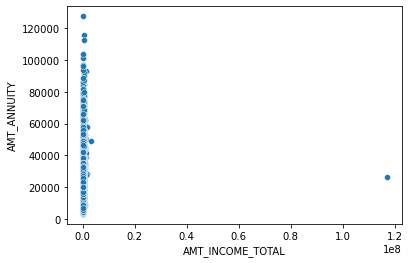

In [222]:
sns.scatterplot(data = df_1,x ='AMT_INCOME_TOTAL',y = 'AMT_ANNUITY')
plt.show()
# Presence of one distinct outlier

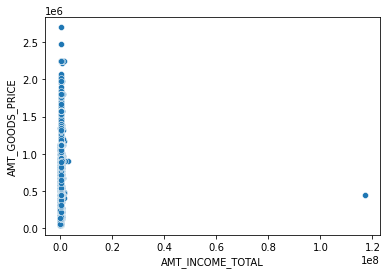

In [223]:
sns.scatterplot(data = df_1,x ='AMT_INCOME_TOTAL',y = 'AMT_GOODS_PRICE')
plt.show()
# Presence of one distinct outlier